/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



Training RNN model for rating


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10, Loss: 2.1441, Accuracy: 0.2046
Epoch 2/10, Loss: 2.1254, Accuracy: 0.2133
Epoch 3/10, Loss: 2.1198, Accuracy: 0.2242
Epoch 4/10, Loss: 2.1172, Accuracy: 0.2189
Epoch 5/10, Loss: 2.1156, Accuracy: 0.2192
Epoch 6/10, Loss: 2.1147, Accuracy: 0.2158
Epoch 7/10, Loss: 2.1135, Accuracy: 0.2217
Epoch 8/10, Loss: 2.1133, Accuracy: 0.2261
Epoch 9/10, Loss: 2.1645, Accuracy: 0.1953
Epoch 10/10, Loss: 2.1456, Accuracy: 0.1956


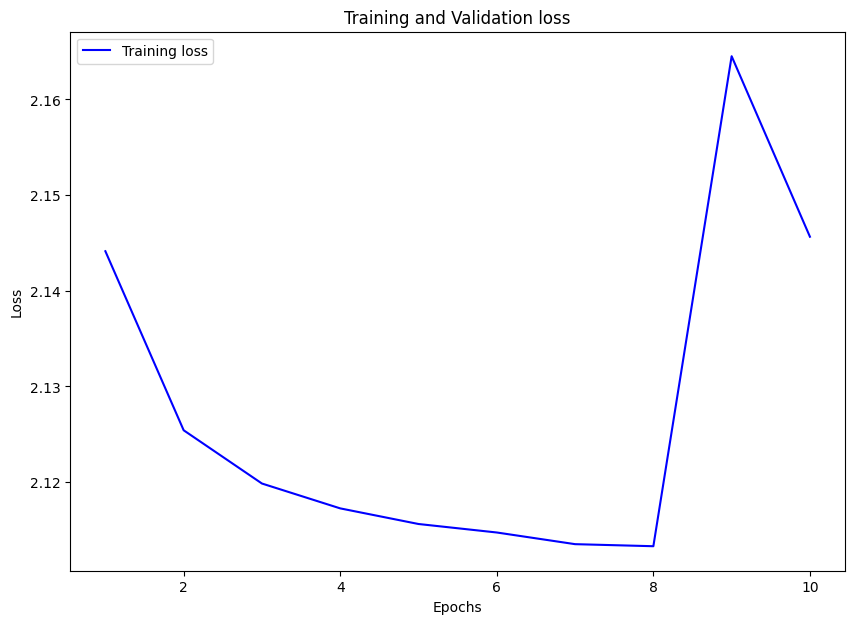


Evaluating RNN model for rating


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Loss: 2.2117442809618435
Accuracy: 0.23038605230386053
Balanced Accuracy: 0.1
F1 Score: 0.08627817748221497
Precision: 0.053077733096157154
Recall: 0.23038605230386053
ROC AUC: None
Confusion Matrix: 
[[  0   0   0   0   0   0   0   0   0  71]
 [  0   0   0   0   0   0   0   0   0  33]
 [  0   0   0   0   0   0   0   0   0  39]
 [  0   0   0   0   0   0   0   0   0  27]
 [  0   0   0   0   0   0   0   0   0  45]
 [  0   0   0   0   0   0   0   0   0  59]
 [  0   0   0   0   0   0   0   0   0  88]
 [  0   0   0   0   0   0   0   0   0 152]
 [  0   0   0   0   0   0   0   0   0 104]
 [  0   0   0   0   0   0   0   0   0 185]]


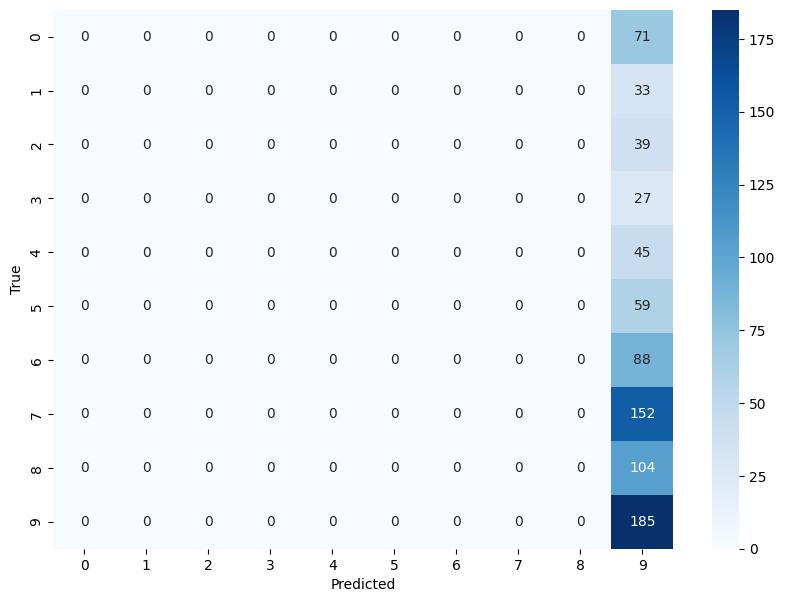

(0.23038605230386053,
 0.1,
 0.08627817748221497,
 0.053077733096157154,
 0.23038605230386053,
 None,
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  71],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  33],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  39],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  27],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  45],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  59],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 152],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 104],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 185]]))

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import numpy as np
from transformers import BertTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

drug_reviews_druglib_com = fetch_ucirepo(id=461)
df = drug_reviews_druglib_com.data.features[['rating', 'effectiveness', 'sideEffects', 'benefitsReview', 'sideEffectsReview', 'commentsReview']]

df = df.dropna().copy()

label_encoders = {}
for column in ['effectiveness', 'sideEffects', 'rating']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['rating', 'effectiveness', 'sideEffects']),
    df[['rating', 'effectiveness', 'sideEffects']],
    test_size=0.2,
    random_state=42
)

y_train_rating = y_train['rating']
y_train_effectiveness = y_train['effectiveness']
y_train_side_effects = y_train['sideEffects']

# Separate target values for testing
y_test_rating = y_test['rating']
y_test_effectiveness = y_test['effectiveness']
y_test_side_effects = y_test['sideEffects']


class ReviewsDataset(Dataset):
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, item):
        review = str(self.reviews.iloc[item])
        target = self.targets.iloc[item]

        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

def create_data_loader(reviews, targets, tokenizer, max_len, batch_size):
    ds = ReviewsDataset(
        reviews=reviews,
        targets=targets,
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(ds, batch_size=batch_size, num_workers=4)

MAX_LEN = 128
BATCH_SIZE = 32

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Create data loaders for each target
train_data_loader_rating = create_data_loader(X_train, y_train_rating, bert_tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader_rating = create_data_loader(X_test, y_test_rating, bert_tokenizer, MAX_LEN, BATCH_SIZE)

train_data_loader_effectiveness = create_data_loader(X_train, y_train_effectiveness, bert_tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader_effectiveness = create_data_loader(X_test, y_test_effectiveness, bert_tokenizer, MAX_LEN, BATCH_SIZE)

train_data_loader_side_effects = create_data_loader(X_train, y_train_side_effects, bert_tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader_side_effects = create_data_loader(X_test, y_test_side_effects, bert_tokenizer, MAX_LEN, BATCH_SIZE)


class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

def train_model_rnn(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    train_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for batch in train_loader:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            targets = batch['targets'].to(device)

            outputs = model(input_ids)

            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct / total
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

    return train_losses

def evaluate_model_rnn(model, data_loader, criterion):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    targets_all = []
    predictions_all = []
    test_loss = 0.0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            targets = batch['targets'].to(device)

            outputs = model(input_ids)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

            _, predictions = torch.max(outputs, 1)

            targets_all.extend(targets.cpu().numpy())
            predictions_all.extend(predictions.cpu().numpy())

    test_loss /= len(data_loader)
    accuracy = accuracy_score(targets_all, predictions_all)
    balanced_accuracy = balanced_accuracy_score(targets_all, predictions_all)
    f1 = f1_score(targets_all, predictions_all, average='weighted')
    precision = precision_score(targets_all, predictions_all, average='weighted')
    recall = recall_score(targets_all, predictions_all, average='weighted')
    try:
        roc_auc = roc_auc_score(targets_all, predictions_all, multi_class='ovr')
    except ValueError:
        roc_auc = None  # Handle cases where ROC AUC is not defined
    conf_matrix = confusion_matrix(targets_all, predictions_all)

    print(f'Test Loss: {test_loss}')
    print(f'Accuracy: {accuracy}')
    print(f'Balanced Accuracy: {balanced_accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'ROC AUC: {roc_auc}')
    print(f'Confusion Matrix: \n{conf_matrix}')

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return accuracy, balanced_accuracy, f1, precision, recall, roc_auc, conf_matrix

def plot_learning_curves(train_losses, val_losses=None):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(10, 7))
    plt.plot(epochs, train_losses, 'b', label='Training loss')
    if val_losses is not None:
        plt.plot(epochs, val_losses, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

vocab_size = len(bert_tokenizer)
embedding_dim = 128
hidden_size = 256
output_size = len(df['rating'].unique())
num_epochs = 10
learning_rate = 1e-3

rnn_model = SimpleRNN(vocab_size, embedding_dim, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=learning_rate)

print("\nTraining RNN model for rating")
train_losses = train_model_rnn(rnn_model, train_data_loader_rating, criterion, optimizer, num_epochs)
plot_learning_curves(train_losses)
print("\nEvaluating RNN model for rating")
evaluate_model_rnn(rnn_model, test_data_loader_rating, criterion)



Training GRU model for rating


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10, Loss: 2.1382, Accuracy: 0.2031
Epoch 2/10, Loss: 2.1258, Accuracy: 0.2124
Epoch 3/10, Loss: 2.1201, Accuracy: 0.2146
Epoch 4/10, Loss: 2.1115, Accuracy: 0.2245
Epoch 5/10, Loss: 2.0850, Accuracy: 0.2426
Epoch 6/10, Loss: 2.0064, Accuracy: 0.2809
Epoch 7/10, Loss: 1.8717, Accuracy: 0.3388
Epoch 8/10, Loss: 1.7220, Accuracy: 0.3896
Epoch 9/10, Loss: 1.6299, Accuracy: 0.4232
Epoch 10/10, Loss: 1.5084, Accuracy: 0.4706


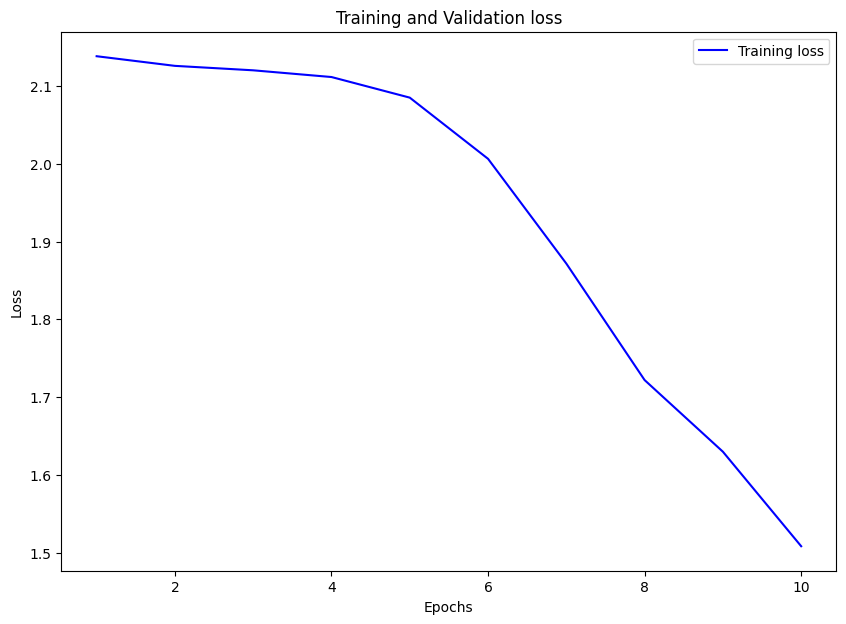


Evaluating GRU model for rating


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Loss: 2.977143874535194
Accuracy: 0.149439601494396
Balanced Accuracy: 0.10479837769311455
F1 Score: 0.11510231916590909
Precision: 0.11719099667199374
Recall: 0.149439601494396
ROC AUC: None
Confusion Matrix: 
[[ 0  0  0  0  1  0 19 21 19 11]
 [ 0  0  0  0  1  0  4 10 16  2]
 [ 0  0  0  0  0  0  7 15 14  3]
 [ 0  0  0  0  2  0  7 10  7  1]
 [ 0  0  0  0  4  0 11  7 22  1]
 [ 0  0  0  0  1  0 13 23 19  3]
 [ 0  0  0  0  2  0 19 25 31 11]
 [ 0  0  0  0  6  0 38 43 47 18]
 [ 0  0  0  0  3  0 24 30 40  7]
 [ 0  0  0  0  7  0 44 59 61 14]]


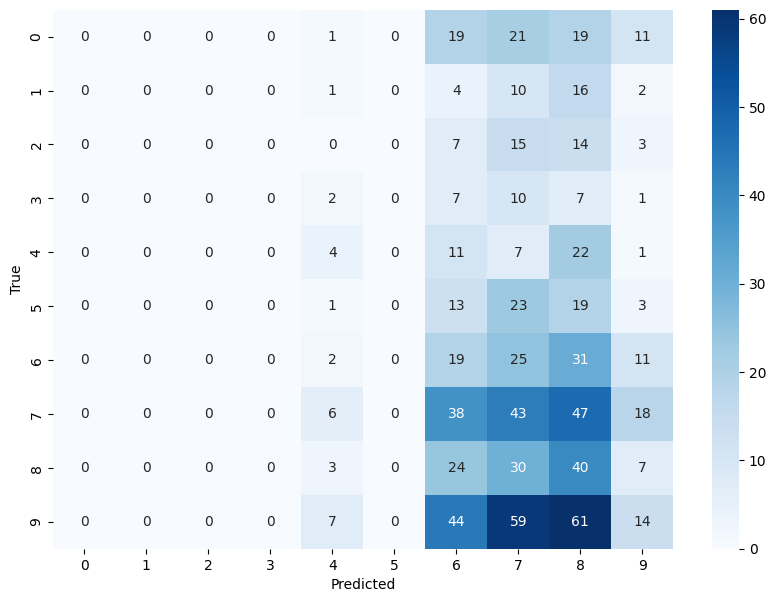

(0.149439601494396,
 0.10479837769311455,
 0.11510231916590909,
 0.11719099667199374,
 0.149439601494396,
 None,
 array([[ 0,  0,  0,  0,  1,  0, 19, 21, 19, 11],
        [ 0,  0,  0,  0,  1,  0,  4, 10, 16,  2],
        [ 0,  0,  0,  0,  0,  0,  7, 15, 14,  3],
        [ 0,  0,  0,  0,  2,  0,  7, 10,  7,  1],
        [ 0,  0,  0,  0,  4,  0, 11,  7, 22,  1],
        [ 0,  0,  0,  0,  1,  0, 13, 23, 19,  3],
        [ 0,  0,  0,  0,  2,  0, 19, 25, 31, 11],
        [ 0,  0,  0,  0,  6,  0, 38, 43, 47, 18],
        [ 0,  0,  0,  0,  3,  0, 24, 30, 40,  7],
        [ 0,  0,  0,  0,  7,  0, 44, 59, 61, 14]]))

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import numpy as np
from transformers import BertTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

drug_reviews_druglib_com = fetch_ucirepo(id=461)
df = drug_reviews_druglib_com.data.features[['rating', 'effectiveness', 'sideEffects', 'benefitsReview', 'sideEffectsReview', 'commentsReview']
df = df.dropna().copy()

label_encoders = {}
for column in ['effectiveness', 'sideEffects', 'rating']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['rating', 'effectiveness', 'sideEffects']),
    df[['rating', 'effectiveness', 'sideEffects']],
    test_size=0.2,
    random_state=42
)

y_train_rating = y_train['rating']
y_train_effectiveness = y_train['effectiveness']
y_train_side_effects = y_train['sideEffects']

y_test_rating = y_test['rating']
y_test_effectiveness = y_test['effectiveness']
y_test_side_effects = y_test['sideEffects']


class ReviewsDataset(Dataset):
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, item):
        review = str(self.reviews.iloc[item])
        target = self.targets.iloc[item]

        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

def create_data_loader(reviews, targets, tokenizer, max_len, batch_size):
    ds = ReviewsDataset(
        reviews=reviews,
        targets=targets,
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(ds, batch_size=batch_size, num_workers=4)

MAX_LEN = 128
BATCH_SIZE = 32

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

train_data_loader_rating = create_data_loader(X_train, y_train_rating, bert_tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader_rating = create_data_loader(X_test, y_test_rating, bert_tokenizer, MAX_LEN, BATCH_SIZE)

train_data_loader_effectiveness = create_data_loader(X_train, y_train_effectiveness, bert_tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader_effectiveness = create_data_loader(X_test, y_test_effectiveness, bert_tokenizer, MAX_LEN, BATCH_SIZE)

train_data_loader_side_effects = create_data_loader(X_train, y_train_side_effects, bert_tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader_side_effects = create_data_loader(X_test, y_test_side_effects, bert_tokenizer, MAX_LEN, BATCH_SIZE)


class GRUModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

def train_model_rnn(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    train_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for batch in train_loader:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            targets = batch['targets'].to(device)

            outputs = model(input_ids)

            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct / total
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

    return train_losses

def evaluate_model_rnn(model, data_loader, criterion):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    targets_all = []
    predictions_all = []
    test_loss = 0.0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            targets = batch['targets'].to(device)

            outputs = model(input_ids)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

            _, predictions = torch.max(outputs, 1)

            targets_all.extend(targets.cpu().numpy())
            predictions_all.extend(predictions.cpu().numpy())

    test_loss /= len(data_loader)
    accuracy = accuracy_score(targets_all, predictions_all)
    balanced_accuracy = balanced_accuracy_score(targets_all, predictions_all)
    f1 = f1_score(targets_all, predictions_all, average='weighted')
    precision = precision_score(targets_all, predictions_all, average='weighted')
    recall = recall_score(targets_all, predictions_all, average='weighted')
    try:
        roc_auc = roc_auc_score(targets_all, predictions_all, multi_class='ovr')
    except ValueError:
        roc_auc = None  # Handle cases where ROC AUC is not defined
    conf_matrix = confusion_matrix(targets_all, predictions_all)

    print(f'Test Loss: {test_loss}')
    print(f'Accuracy: {accuracy}')
    print(f'Balanced Accuracy: {balanced_accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'ROC AUC: {roc_auc}')
    print(f'Confusion Matrix: \n{conf_matrix}')

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return accuracy, balanced_accuracy, f1, precision, recall, roc_auc, conf_matrix

def plot_learning_curves(train_losses, val_losses=None):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(10, 7))
    plt.plot(epochs, train_losses, 'b', label='Training loss')
    if val_losses is not None:
        plt.plot(epochs, val_losses, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

vocab_size = len(bert_tokenizer)
embedding_dim = 128
hidden_size = 256
output_size = len(df['rating'].unique())
num_epochs = 10
learning_rate = 1e-3

gru_model = GRUModel(vocab_size, embedding_dim, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gru_model.parameters(), lr=learning_rate)

print("\nTraining GRU model for rating")
train_losses = train_model_rnn(gru_model, train_data_loader_rating, criterion, optimizer, num_epochs)
plot_learning_curves(train_losses)
print("\nEvaluating GRU model for rating")
evaluate_model_rnn(gru_model, test_data_loader_rating, criterion)
